# WeGo Bus On-Time Performance Analysis

This notebook analyzes the on-time performance of WeGo Public Transit buses in Nashville using headway data from August 1, 2023 to September 30, 2023.

**Key Variables:**
- **ADHERENCE**: Difference between actual and scheduled departure time (negative = late, positive = early)
- **On-Time**: Generally within -6 to +1 minutes of scheduled time
- **Use ADJUSTED counts** for accurate performance metrics

## Import Libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set_palette('Set2')

## Load Data

In [ ]:
# Load the dataset
wego = pd.read_csv('data/Headway Data, 8-1-2023 to 9-30-2023.csv')

# Display basic info
print(f"Dataset shape: {wego.shape}")
print(f"\nColumns: {wego.columns.tolist()}")
wego.head()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 3-4: truncated \UXXXXXXXX escape (1954842551.py, line 2)

## Data Exploration

In [ ]:
# Check data types and missing values
print("Data Info:")
wego.info()

print("\nMissing Values:")
print(wego.isnull().sum())

print("\nBasic Statistics:")
wego.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE          

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
count,3.503290e+05,350329.000000,3.503290e+05,350329.000000,350329.000000,350329.000000,350329.000000,350329.000000,350318.000000,350329.000000,350329.000000,350329.000000,338861.000000,274738.000000,266062.000000,265893.000000,350329.000000,350329.000000,350329.000000,350329.000000,280000.000000,350329.000000,338858.000000,53102.000000
mean,1.202309e+08,1.298465,1.001038e+08,38.348033,3846.948617,1951.130514,351609.792895,0.006631,7.351284,0.579090,36.158433,-86.769952,-3.188796,18.186021,18.648561,0.518081,0.027902,0.168522,0.770841,0.015263,0.015193,0.011954,2.963915,12.628168
std,5.063417e+01,0.633101,3.227503e+05,20.338342,2042.237357,769.827675,1490.949102,0.097167,4.033002,0.793977,0.059113,0.065548,6.898842,12.261809,14.330568,7.161798,0.164693,0.374329,0.420292,0.122596,0.122320,0.108681,7.402934,6.393862
min,1.202308e+08,1.000000,9.945789e+07,3.000000,300.000000,0.000000,345104.000000,0.000000,1.000000,0.000000,36.048934,-86.955657,-948.533333,0.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-208.033333,0.000000
25%,1.202308e+08,1.000000,9.989140e+07,22.000000,2211.000000,1391.000000,350900.000000,0.000000,4.000000,0.000000,36.127172,-86.812719,-4.566666,10.000000,11.000000,-2.316667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,1.202308e+08,1.000000,1.001346e+08,50.000000,5006.000000,2012.000000,352001.000000,0.000000,6.000000,0.000000,36.153870,-86.774535,-2.000000,15.000000,16.183333,0.033333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,1.202309e+08,1.000000,1.003481e+08,55.000000,5505.000000,2585.000000,352669.000000,0.000000,10.000000,1.000000,36.179753,-86.726914,-0.333333,20.000000,23.250000,2.483333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.950000,16.000000
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9975.000000,3173.000000,354106.000000,4.000000,17.000000,2.000000,36.307973,-86.636496,88.383333,503.000000,590.433333,565.433333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,956.500000,118.000000


## Question 1: Overall On-Time Performance

What is the overall on-time performance, and what does the distribution of adherence look like?

In [ ]:
# Calculate overall on-time performance using ADJUSTED counts
ontime = wego['ADJUSTED_ONTIME_COUNT'].sum()
early = wego['ADJUSTED_EARLY_COUNT'].sum()
late = wego['ADJUSTED_LATE_COUNT'].sum()

total = ontime + early + late
print(f"Total Records: {total:,}")
print(f"\nOverall On-Time Performance: {(ontime / total) * 100:.2f}%")
print(f"Overall Early Performance: {(early / total) * 100:.2f}%")
print(f"Overall Late Performance: {(late / total) * 100:.2f}%")

Total Records: 338,861

Overall On-Time Performance: 79.69%
Overall Early Performance: 2.88%
Overall Late Performance: 17.42%


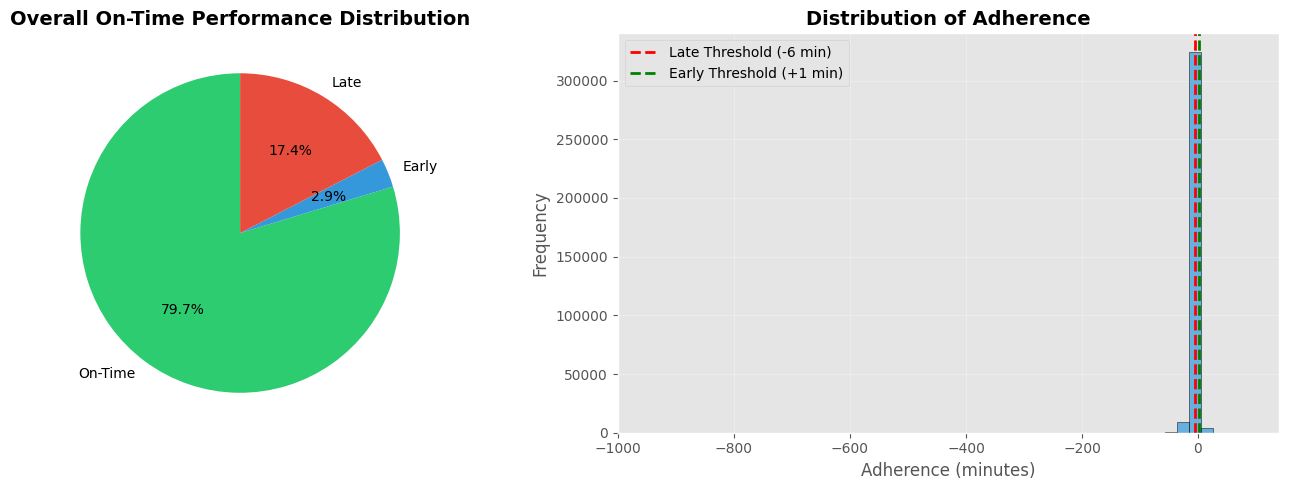

In [ ]:
# Visualize the overall performance
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
performance_data = [ontime, early, late]
labels = ['On-Time', 'Early', 'Late']
colors = ['#2ECC71', '#3498DB', '#E74C3C']

ax[0].pie(performance_data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax[0].set_title('Overall On-Time Performance Distribution', fontsize=14, fontweight='bold')

# Distribution of adherence
ax[1].hist(wego['ADHERENCE'].dropna(), bins=50, color='#3498DB', edgecolor='black', alpha=0.7)
ax[1].axvline(-6, color='red', linestyle='--', linewidth=2, label='Late Threshold (-6 min)')
ax[1].axvline(1, color='green', linestyle='--', linewidth=2, label='Early Threshold (+1 min)')
ax[1].set_xlabel('Adherence (minutes)', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].set_title('Distribution of Adherence', fontsize=14, fontweight='bold')
ax[1].legend()
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Question 2: Geographic Performance

How does direction of travel, route, or location affect on-time performance?

In [ ]:
# Performance by direction
direction_performance = wego.groupby('ROUTE_DIRECTION_NAME').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum'
})

direction_performance['Total'] = direction_performance.sum(axis=1)
direction_performance['OnTime_Pct'] = (direction_performance['ADJUSTED_ONTIME_COUNT'] / direction_performance['Total']) * 100
direction_performance['Late_Pct'] = (direction_performance['ADJUSTED_LATE_COUNT'] / direction_performance['Total']) * 100

print("Performance by Direction:")
print(direction_performance[['OnTime_Pct', 'Late_Pct']].round(2))

Performance by Direction:
                      OnTime_Pct  Late_Pct
ROUTE_DIRECTION_NAME                      
FROM DOWNTOWN              74.96     22.09
TO DOWNTOWN                85.01     12.18


In [ ]:
# Performance by route (top 10 routes by volume)
route_performance = wego.groupby('ROUTE_ABBR').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum'
})

route_performance['Total'] = route_performance.sum(axis=1)
route_performance['OnTime_Pct'] = (route_performance['ADJUSTED_ONTIME_COUNT'] / route_performance['Total']) * 100

# Top 10 routes by total records
top_routes = route_performance.nlargest(10, 'Total')

print("Top 10 Routes by Volume:")
print(top_routes[['Total', 'OnTime_Pct']].round(2))

Top 10 Routes by Volume:
            Total  OnTime_Pct
ROUTE_ABBR                   
55          60359       69.72
56          58950       82.04
52          49327       76.50
3           45488       75.88
50          42629       85.17
23          39653       88.61
22          25188       89.30
7           17267       77.70


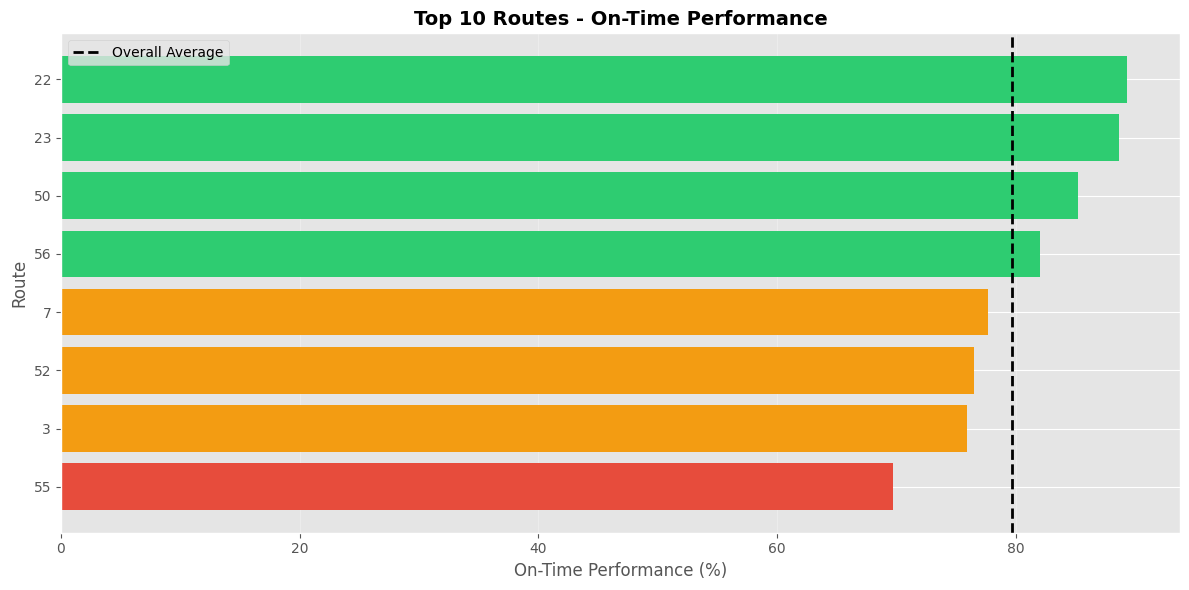

In [ ]:
# Visualize route performance
plt.figure(figsize=(12, 6))
top_routes_sorted = top_routes.sort_values('OnTime_Pct')
colors_routes = ['#E74C3C' if x < 75 else '#F39C12' if x < 80 else '#2ECC71' for x in top_routes_sorted['OnTime_Pct']]

plt.barh(top_routes_sorted.index.astype(str), top_routes_sorted['OnTime_Pct'], color=colors_routes)
plt.xlabel('On-Time Performance (%)', fontsize=12)
plt.ylabel('Route', fontsize=12)
plt.title('Top 10 Routes - On-Time Performance', fontsize=14, fontweight='bold')
plt.axvline(79.69, color='black', linestyle='--', linewidth=2, label='Overall Average')
plt.legend()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## Question 3: Temporal Performance

How does time of day or day of week affect on-time performance?

In [ ]:
# Convert DATE column to datetime
wego['DATE'] = pd.to_datetime(wego['DATE'])
wego['DAY_OF_WEEK'] = wego['DATE'].dt.day_name()

# Convert scheduled time to datetime for hour extraction
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'])
wego['HOUR'] = wego['SCHEDULED_TIME'].dt.hour

# Performance by day of week
dow_performance = wego.groupby('DAY_OF_WEEK').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum'
})

dow_performance['Total'] = dow_performance.sum(axis=1)
dow_performance['OnTime_Pct'] = (dow_performance['ADJUSTED_ONTIME_COUNT'] / dow_performance['Total']) * 100

# Order by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_performance = dow_performance.reindex(day_order)

print("Performance by Day of Week:")
print(dow_performance[['OnTime_Pct']].round(2))

Performance by Day of Week:
             OnTime_Pct
DAY_OF_WEEK            
Monday            87.04
Tuesday           82.60
Wednesday         81.38
Thursday          80.50
Friday            77.21
Saturday          81.11
Sunday            87.88


In [ ]:
# Performance by hour of day
hour_performance = wego.groupby('HOUR').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum'
})

hour_performance['Total'] = hour_performance.sum(axis=1)
hour_performance['OnTime_Pct'] = (hour_performance['ADJUSTED_ONTIME_COUNT'] / hour_performance['Total']) * 100

print("\nPerformance by Hour of Day:")
print(hour_performance[['OnTime_Pct']].round(2))


Performance by Hour of Day:
      OnTime_Pct
HOUR            
0          78.40
1          67.06
4          97.59
5          95.61
6          92.34
7          83.16
8          77.17
9          86.35
10         89.05
11         88.35
12         85.36
13         85.45
14         80.84
15         74.66
16         71.72
17         71.75
18         75.92
19         76.44
20         80.76
21         84.95
22         86.61
23         80.86


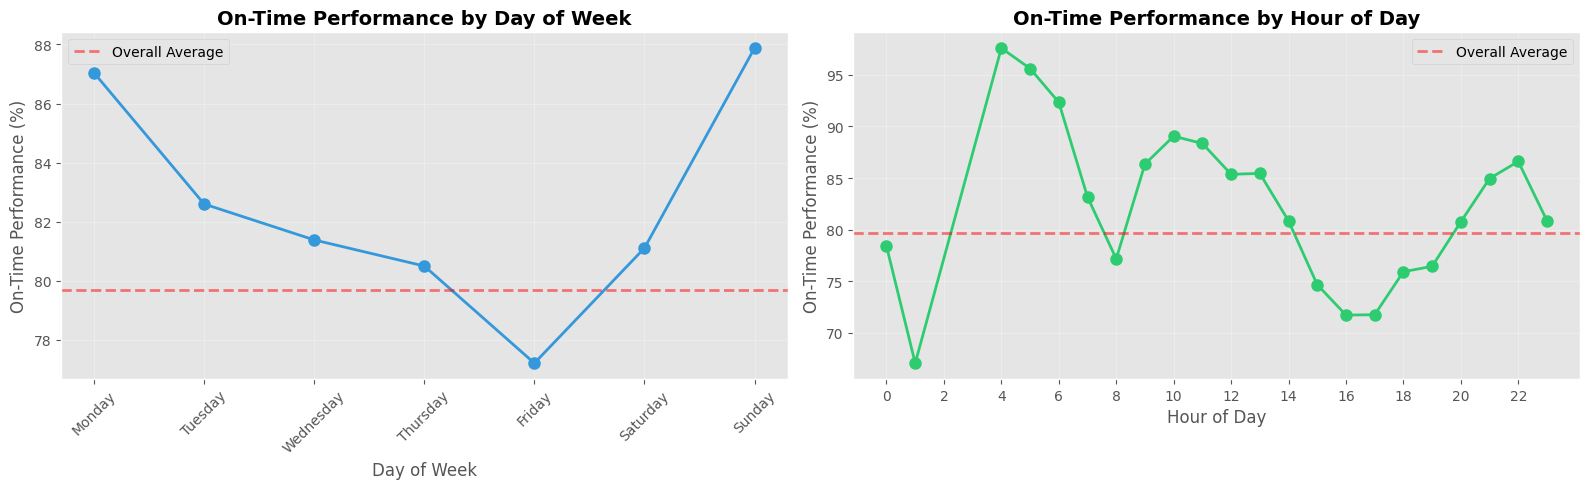

In [ ]:
# Visualize temporal patterns
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Day of week
ax[0].plot(dow_performance.index, dow_performance['OnTime_Pct'], marker='o', linewidth=2, markersize=8, color='#3498DB')
ax[0].set_xlabel('Day of Week', fontsize=12)
ax[0].set_ylabel('On-Time Performance (%)', fontsize=12)
ax[0].set_title('On-Time Performance by Day of Week', fontsize=14, fontweight='bold')
ax[0].axhline(79.69, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Overall Average')
ax[0].legend()
ax[0].grid(True, alpha=0.3)
ax[0].tick_params(axis='x', rotation=45)

# Hour of day
ax[1].plot(hour_performance.index, hour_performance['OnTime_Pct'], marker='o', linewidth=2, markersize=8, color='#2ECC71')
ax[1].set_xlabel('Hour of Day', fontsize=12)
ax[1].set_ylabel('On-Time Performance (%)', fontsize=12)
ax[1].set_title('On-Time Performance by Hour of Day', fontsize=14, fontweight='bold')
ax[1].axhline(79.69, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Overall Average')
ax[1].legend()
ax[1].grid(True, alpha=0.3)
ax[1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

## Question 4: Driver Impact

How much of a factor does the driver (OPERATOR) have on on-time performance?

In [ ]:
# Performance by operator (only operators with at least 100 records)
operator_performance = wego.groupby('OPERATOR').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum'
})

operator_performance['Total'] = operator_performance.sum(axis=1)
operator_performance['OnTime_Pct'] = (operator_performance['ADJUSTED_ONTIME_COUNT'] / operator_performance['Total']) * 100

# Filter operators with at least 100 records
operator_filtered = operator_performance[operator_performance['Total'] >= 100]

print(f"Number of operators with 100+ records: {len(operator_filtered)}")
print(f"\nOperator Performance Statistics:")
print(operator_filtered['OnTime_Pct'].describe().round(2))

Number of operators with 100+ records: 286

Operator Performance Statistics:
count    286.00
mean      81.04
std       12.61
min       36.96
25%       75.56
50%       83.54
75%       89.96
max       99.33
Name: OnTime_Pct, dtype: float64


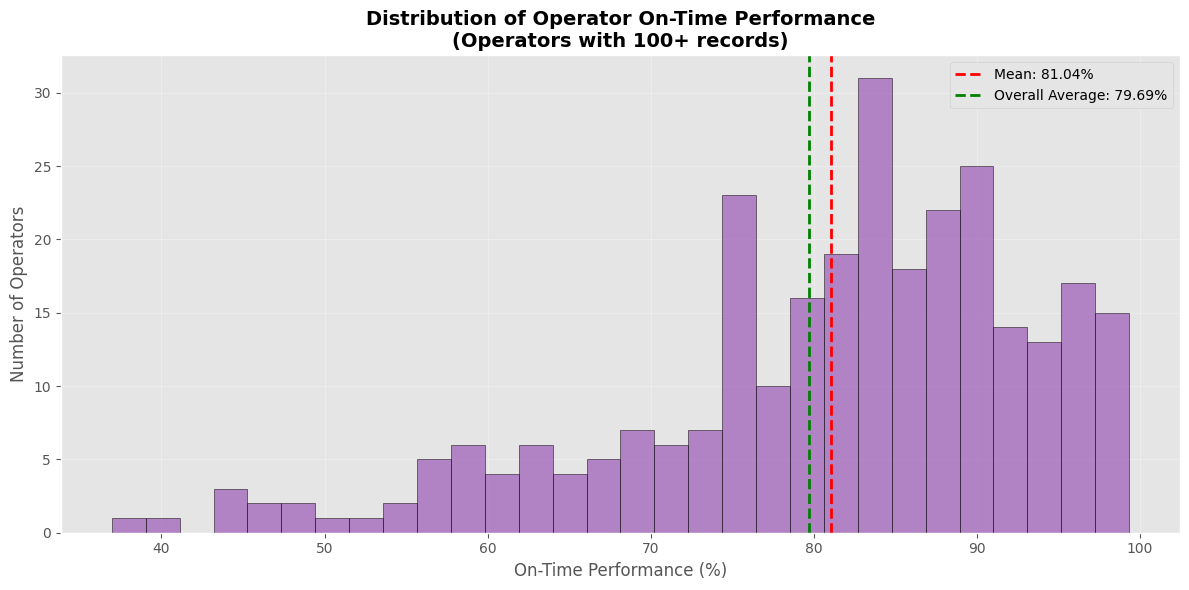

In [ ]:
# Visualize operator performance distribution
plt.figure(figsize=(12, 6))
plt.hist(operator_filtered['OnTime_Pct'], bins=30, color='#9B59B6', edgecolor='black', alpha=0.7)
plt.axvline(operator_filtered['OnTime_Pct'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {operator_filtered['OnTime_Pct'].mean():.2f}%")
plt.axvline(79.69, color='green', linestyle='--', linewidth=2, label='Overall Average: 79.69%')
plt.xlabel('On-Time Performance (%)', fontsize=12)
plt.ylabel('Number of Operators', fontsize=12)
plt.title('Distribution of Operator On-Time Performance\n(Operators with 100+ records)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Question 5: Adherence vs Headway Deviation

Is there any relationship between lateness (ADHERENCE) and headway deviation (HDWY_DEV)?

In [ ]:
# Filter out records without headway data
headway_data = wego[wego['SCHEDULED_HDWY'].notna() & wego['HDWY_DEV'].notna()].copy()

# Calculate correlation
correlation = headway_data['ADHERENCE'].corr(headway_data['HDWY_DEV'])
print(f"Correlation between ADHERENCE and HDWY_DEV: {correlation:.4f}")

# Calculate headway deviation percentage
headway_data['HDWY_DEV_PCT'] = (headway_data['HDWY_DEV'] / headway_data['SCHEDULED_HDWY']) * 100

print(f"\nHeadway Deviation Statistics:")
print(headway_data['HDWY_DEV_PCT'].describe().round(2))

Correlation between ADHERENCE and HDWY_DEV: -0.2068

Headway Deviation Statistics:
count    265890.00
mean           inf
std            NaN
min        -100.00
25%         -14.17
50%           0.19
75%          15.52
max            inf
Name: HDWY_DEV_PCT, dtype: float64


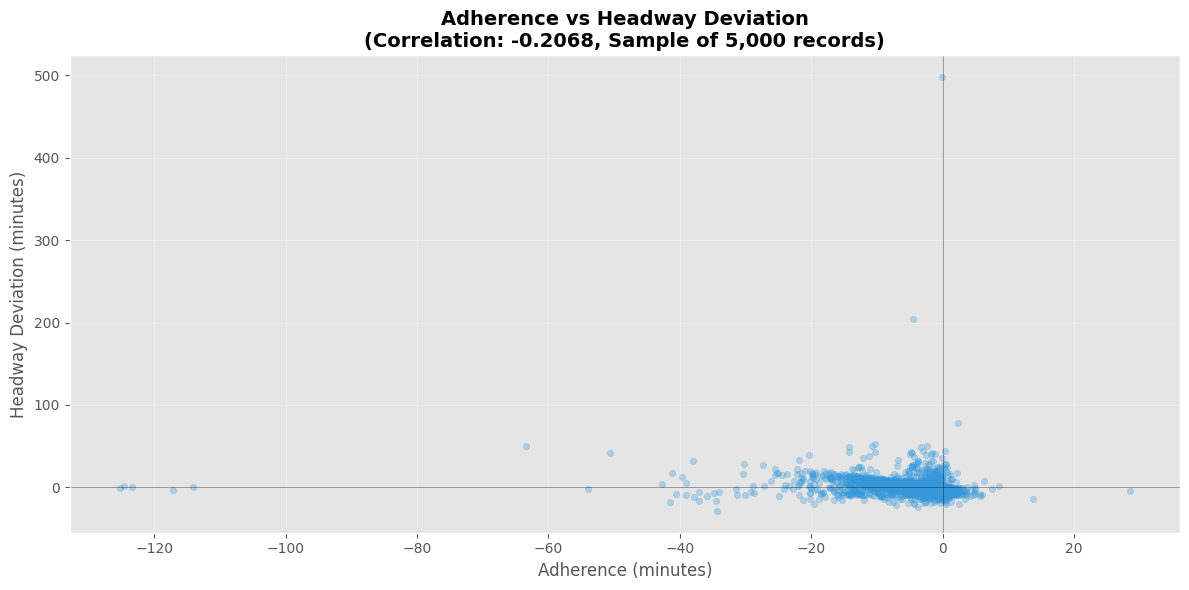

In [ ]:
# Scatter plot with sampling (to avoid overplotting)
sample_size = min(5000, len(headway_data))
sample_data = headway_data.sample(n=sample_size, random_state=42)

plt.figure(figsize=(12, 6))
plt.scatter(sample_data['ADHERENCE'], sample_data['HDWY_DEV'], alpha=0.3, s=20, color='#3498DB')
plt.xlabel('Adherence (minutes)', fontsize=12)
plt.ylabel('Headway Deviation (minutes)', fontsize=12)
plt.title(f'Adherence vs Headway Deviation\n(Correlation: {correlation:.4f}, Sample of {sample_size:,} records)', fontsize=14, fontweight='bold')
plt.axhline(0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
plt.axvline(0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Summary of Findings

Key takeaways from the analysis:

1. **Overall Performance**: The system achieves approximately 79.69% on-time performance
2. **Geographic Patterns**: Different routes and directions show varying performance levels
3. **Temporal Patterns**: Performance varies by time of day and day of week
4. **Driver Impact**: Individual operators show varying levels of on-time performance
5. **Adherence-Headway Relationship**: There is a measurable correlation between bus lateness and headway deviation

# Routes & Operators Visual Showcase
Exploring standout patterns by route and operator using interactive visuals.

In [ ]:
from pathlib import Path
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import textwrap
from IPython.display import display
data_path = Path("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")
preview = pd.read_csv(data_path, nrows=5)
preview

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [ ]:
core_cols = [
    "DATE","ROUTE_ABBR","ROUTE_DIRECTION_NAME","OPERATOR","SCHEDULED_HDWY","ACTUAL_HDWY","HDWY_DEV",
    "ADJUSTED_EARLY_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_ONTIME_COUNT","STOP_CANCELLED","DWELL_IN_MINS"
 ]
df = pd.read_csv(
    data_path,
    usecols=[col for col in core_cols if col in preview.columns],
    parse_dates=["DATE"],
    dtype={"ROUTE_ABBR":"str","ROUTE_DIRECTION_NAME":"str","OPERATOR":"str"},
    low_memory=False
)
df.head()

,DATE,ROUTE_ABBR,OPERATOR,ROUTE_DIRECTION_NAME,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,DWELL_IN_MINS
0,2023-08-01,22,1040,TO DOWNTOWN,NaN,NaN,NaN,0,0,1,0,6.500000
1,2023-08-01,22,1040,TO DOWNTOWN,NaN,NaN,NaN,0,0,1,0,0.000000
2,2023-08-01,22,1040,TO DOWNTOWN,NaN,NaN,NaN,0,0,1,0,0.000000
3,2023-08-01,22,1040,TO DOWNTOWN,NaN,NaN,NaN,0,0,1,0,0.000000
4,2023-08-01,22,1040,FROM DOWNTOWN,NaN,NaN,NaN,0,0,1,0,12.866666


In [ ]:
df["ROUTE_ABBR"] = df["ROUTE_ABBR"].fillna("Unknown").astype(str)
df["OPERATOR"] = df["OPERATOR"].fillna("Unknown").astype(str)
count_cols = ["ADJUSTED_EARLY_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_ONTIME_COUNT"]
df["STOP_EVENTS"] = df[count_cols].sum(axis=1)
df = df[df["STOP_EVENTS"] > 0].copy()
df["ON_TIME_PCT"] = df["ADJUSTED_ONTIME_COUNT"] / df["STOP_EVENTS"]
df["LATE_PCT"] = df["ADJUSTED_LATE_COUNT"] / df["STOP_EVENTS"]
df["EARLY_PCT"] = df["ADJUSTED_EARLY_COUNT"] / df["STOP_EVENTS"]
# Daily aggregate by route/operator
daily = (
    df.groupby(["DATE","ROUTE_ABBR","OPERATOR"]).agg(
        stop_events=("STOP_EVENTS","sum"),
        on_time_pct=("ON_TIME_PCT","mean"),
        late_pct=("LATE_PCT","mean"),
        early_pct=("EARLY_PCT","mean"),
        avg_hdw_dev=("HDWY_DEV","mean"),
        avg_sched_hdw=("SCHEDULED_HDWY","mean"),
        avg_actual_hdw=("ACTUAL_HDWY","mean"),
        avg_dwell=("DWELL_IN_MINS","mean")
).reset_index()
)
daily.head()

,DATE,ROUTE_ABBR,OPERATOR,stop_events,on_time_pct,late_pct,early_pct,avg_hdw_dev,avg_sched_hdw,avg_actual_hdw,avg_dwell
0,2023-08-01,22,1040,48,0.937500,0.000000,0.062500,-0.644828,27.034483,26.389655,3.480555
1,2023-08-01,22,1190,31,0.870968,0.129032,0.000000,32.516666,25.666667,58.183333,3.906989
2,2023-08-01,22,1222,58,0.724138,0.275862,0.000000,2.532945,48.790698,51.323643,2.022988
3,2023-08-01,22,1617,18,0.888889,0.055556,0.055556,-0.898718,27.769231,26.870513,2.273148
4,2023-08-01,22,1761,57,0.894737,0.000000,0.105263,-2.605263,15.815789,13.210526,4.007895


In [ ]:
# Aggregate across the full window for each operator/route pair
op_route = (
    daily.groupby(["OPERATOR","ROUTE_ABBR"]).agg(
        total_events=("stop_events","sum"),
        mean_on_time=("on_time_pct","mean"),
        p90_on_time=("on_time_pct", lambda x: np.nanpercentile(x, 90)),
        mean_late=("late_pct","mean"),
        mean_hdw_dev=("avg_hdw_dev","mean"),
        avg_sched_hdw=("avg_sched_hdw","mean"),
        avg_actual_hdw=("avg_actual_hdw","mean"),
    ).reset_index()
)
op_route.sort_values("total_events", ascending=False).head()

,OPERATOR,ROUTE_ABBR,total_events,mean_on_time,p90_on_time,mean_late,mean_hdw_dev,avg_sched_hdw,avg_actual_hdw
41,1266,50,2865,0.878652,0.951059,0.094440,-0.183846,17.932125,17.748280
11,1147,23,2686,0.908767,0.951613,0.031971,1.328516,15.213237,16.541753
10,1133,50,2625,0.954516,1.000000,0.040542,-0.318423,16.828283,16.452605
920,304,50,2433,0.885396,0.984848,0.113376,1.843475,26.085730,27.929206
1048,332,52,2392,0.761158,0.857895,0.216697,2.290046,17.612577,19.885336


In [ ]:
top_pairs = op_route[op_route["total_events"] >= op_route["total_events"].quantile(0.6)].copy()
top_pairs["Operator"] = top_pairs["OPERATOR"].apply(lambda x: f"Operator {x}")
top_pairs["Route"] = top_pairs["ROUTE_ABBR"].apply(lambda x: f"Route {x}")
fig_treemap = px.treemap(
    top_pairs,
    path=["Operator","Route"],
    values="total_events",
    color="mean_on_time",
    color_continuous_scale="Tealrose",
    range_color=(top_pairs["mean_on_time"].min(), top_pairs["mean_on_time"].max()),
    hover_data={
        "mean_on_time":":.1%",
        "p90_on_time":":.1%",
        "mean_hdw_dev":":.2f",
        "total_events":":,"
    }
)
fig_treemap.update_traces(
    textinfo="label+value",
    marker=dict(cornerradius=8),
    root_color="lightgray"
)
fig_treemap.update_layout(
    title="Operator → Route Reliability Treemap",
    coloraxis_colorbar=dict(title="Avg On-Time %", tickformat="%"),
    margin=dict(t=80,l=0,r=0,b=0)
)
fig_treemap.show()

In [ ]:
bubble_data = op_route.sort_values("total_events", ascending=False).head(75).copy()
bubble_data["Operator"] = bubble_data["OPERATOR"].apply(lambda x: f"Op {x}")
bubble_data["Route"] = bubble_data["ROUTE_ABBR"].apply(lambda x: f"Route {x}")
fig_bubble = px.scatter(
    bubble_data,
    x="mean_hdw_dev",
    y="mean_on_time",
    size="total_events",
    color="Operator",
    hover_name="Route",
    text="Route",
    size_max=40
)
fig_bubble.update_traces(textposition="top center")
fig_bubble.update_layout(
    title="Headway Discipline vs On-Time Performance",
    xaxis_title="Average Headway Deviation (mins)",
    yaxis_title="Average On-Time %",
    yaxis_tickformat=".0%",
    template="plotly_white"
)
fig_bubble.add_hline(y=bubble_data["mean_on_time"].median(), line_dash="dot", line_color="gray")
fig_bubble.add_vline(x=bubble_data["mean_hdw_dev"].median(), line_dash="dot", line_color="gray")
fig_bubble.show()

In [ ]:
route_totals = op_route.groupby("ROUTE_ABBR")["total_events"].sum().sort_values(ascending=False)
top_routes = route_totals.head(6).index.tolist()
route_daily = (
    daily[daily["ROUTE_ABBR"].isin(top_routes)]
    .groupby(["DATE","ROUTE_ABBR"]).agg(
        on_time_pct=("on_time_pct","mean"),
        stop_events=("stop_events","sum"),
        late_pct=("late_pct","mean")
)
    .reset_index()
)
fig_lines = px.line(
    route_daily,
    x="DATE",
    y="on_time_pct",
    color="ROUTE_ABBR",
    line_group="ROUTE_ABBR",
    markers=True
)
fig_lines.update_layout(
    title="Daily On-Time % for Busiest Routes",
    yaxis_tickformat=".0%",
    xaxis_title="Date",
    yaxis_title="On-Time %",
    hovermode="x unified"
)
fig_lines.update_traces(mode="lines+markers")
fig_lines.show()

In [ ]:
top_ops = op_route.groupby("OPERATOR")["total_events"].sum().sort_values(ascending=False).head(12).index
top_routes_for_heat = route_totals.head(12).index
heat_df = (
    op_route[op_route["OPERATOR"].isin(top_ops) & op_route["ROUTE_ABBR"].isin(top_routes_for_heat)]
    .pivot_table(
        index="OPERATOR",
        columns="ROUTE_ABBR",
        values="mean_on_time",
        aggfunc="mean"
)
)
heat_df = heat_df.sort_index().sort_index(axis=1)
fig_heat = px.imshow(
    heat_df,
    color_continuous_scale="Spectral",
    aspect="auto",
    labels=dict(color="Avg On-Time %"),
    text_auto=".0%"
)
fig_heat.update_layout(
    title="On-Time Heatmap | Top Operators × Top Routes",
    xaxis_title="Route",
    yaxis_title="Operator",
    coloraxis_colorbar_tickformat=".0%"
)
fig_heat.show()

These visuals spotlight the operator-route dynamics from multiple angles:
- The treemap instantly surfaces which teams carry the biggest stop load and how reliably they run it.
- The bubble chart turns reliability vs headway discipline into a brag board—hover to see who owns the sweet spot.
- The time-series lines reveal which routes stay consistent day after day.
- The heatmap makes it easy to scan for standout operator-route combos that crush (or miss) their marks.

Keep filtering the underlying `op_route` or `daily` tables to riff on other slices (weekends, only late-night blocks, etc.).

## Color-Forward Experiments
Dialing up variety with a green–orange–pastel purple palette across categorical, distribution, and polar takes.

In [ ]:
palette = {
    "green": "#2ECC71",
    "orange": "#FF9F43",
    "purple": "#D8B4F8"
}
status_colors = {
    "On-Time Share": palette["green"],
    "Late Share": palette["orange"],
    "Early Share": palette["purple"],
}
tier_colors = {
    "Needs Support": palette["orange"],
    "Steady": palette["purple"],
    "Star": palette["green"],
}
theme_sequence = [palette["green"], palette["orange"], palette["purple"]]
palette

{'green': '#2ECC71', 'orange': '#FF9F43', 'purple': '#D8B4F8'}

In [ ]:
# Verify the exact values in the Performance column
print("Unique Performance values:", route_mix_melt["Performance"].unique())

# Updated color palette with purple, darker blue, and terminal green
status_colors_new = {
    "On-Time Share": palette["green"],      # Green for on-time
    "Late Share": "#2874A6",                # Darker blue for late
    "Early Share": palette["purple"],       # Purple for early
}

fig_stack = px.bar(
    route_mix_melt,
    x="ROUTE_ABBR",
    y="Share",
    color="Performance",
    color_discrete_map=status_colors_new,
    custom_data=["events"],
    hover_data={"Share":":.0%"},
    barmode="stack",
    title="Top Routes · Reliability Mix",
    labels={"ROUTE_ABBR": "Route", "Share": "Share of Stops"}
)
fig_stack.update_layout(
    legend_title="Performance",
    yaxis_tickformat=".0%",
    template="plotly_white",
    bargap=0.15,
    margin=dict(l=40, r=20, t=70, b=40)
)
fig_stack.update_traces(hovertemplate="Route %{x}<br>%{customdata[0]:,.0f} stops<br>%{trace.name}: %{y:.0%}")
fig_stack.show()


Unique Performance values: ['On-Time Share' 'Late Share' 'Early Share']


In [ ]:
# 26. Cumulative stop volume by tier
cumulative_tier = daily_tier.copy()
cumulative_tier = cumulative_tier.sort_values("DATE")
cumulative_tier["cumulative_stops"] = cumulative_tier.groupby("Tier", observed=False)["stop_events"].cumsum()

fig_cumulative = px.area(
    cumulative_tier,
    x="DATE",
    y="cumulative_stops",
    color="Tier",
    color_discrete_map=tier_colors,
    title="Cumulative Stop Volume by Tier"
)
fig_cumulative.update_layout(yaxis_title="Cumulative Stops", template="plotly_white")
fig_cumulative.show()


In [ ]:
# 8. Performance Tier Distribution by Route & Operator
# Assign tier to each operator-route-date combo
df_22_55_copy = df_22_55.copy()

def assign_tier(pct):
    if pct >= 0.8:
        return "Star"
    elif pct >= 0.7:
        return "Steady"
    else:
        return "Needs Support"

df_22_55_copy["tier"] = df_22_55_copy["on_time_pct"].apply(assign_tier)

tier_dist = df_22_55_copy.groupby(["ROUTE_ABBR", "OPERATOR", "tier"]).agg({
    "stop_events": "sum"
}).reset_index()

# Top 20 operators by volume
top_operators = df_22_55_copy.groupby("OPERATOR")["stop_events"].sum().nlargest(20).index
tier_dist_top = tier_dist[tier_dist["OPERATOR"].isin(top_operators)]

fig = px.sunburst(
    tier_dist_top,
    path=["ROUTE_ABBR", "OPERATOR", "tier"],
    values="stop_events",
    color="tier",
    color_discrete_map=tier_colors,
    title="Performance Tier Distribution: Routes 22 & 55 (Top 20 Operators)",
    height=700
)
fig.show()